In [81]:
#Import all relevant libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
import plotly.graph_objs as go


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



%matplotlib inline
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [7]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("Data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [8]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [9]:
dt.show(df, open_browser = True)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [10]:
# Trusted

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [11]:
# updated 9 months ago

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [12]:
# the data is consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [13]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [14]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
df.duplicated().sum()

0

In [16]:
# there is nothing to clean 

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [17]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [18]:
# there is nothing to clean 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [19]:
# check columns types 
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [20]:
categorical_columns = ['position', 'team', 'name']
value = {column: df[column].value_counts() for column in categorical_columns}
value

{'position': position
 Defender Centre-Back          1821
 Attack Centre-Forward         1353
 Goalkeeper                    1229
 midfield-CentralMidfield      1149
 midfield-DefensiveMidfield     900
 Defender Right-Back            867
 Defender Left-Back             807
 midfield-AttackingMidfield     769
 Attack-RightWinger             717
 Attack-LeftWinger              714
 midfield-RightMidfield         102
 midfield-LeftMidfield          100
 midfield                        75
 Attack-SecondStriker            65
 Attack                          53
 Defender                        33
 Name: count, dtype: int64,
 'team': team
 Daejeon Hana Citizen      46
 Jeonbuk Hyundai Motors    46
 FC Seoul                  45
 Gangwon FC                43
 Daegu FC                  42
                           ..
 FC Barcelona              22
 Atlético de Madrid        22
 CA Osasuna                22
 Hatayspor                 12
 Gaziantep FK               6
 Name: count, Length: 374, dty

In [21]:
ranges = df.describe().loc[['min', 'max']]
ranges 

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
min,156.0,15.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,206.0,43.0,107.0,11.25,4.0,30.0,1.0,6.923077,9.0,90.0,9510.0,2349.0,339.0,92.0,180000000.0,200000000.0,4.0,1.0


In [22]:
unique_values = df.nunique()
unique_values

player                 10754
team                     374
name                   10584
position                  16
height                    47
age                       30
appearance               108
goals                   5329
assists                 5065
yellow cards            6291
second yellow cards     1095
red cards               1219
goals conceded           742
clean sheets             635
minutes played          5036
days_injured             772
games_injured            154
award                     46
current_value            128
highest_value            156
position_encoded           4
winger                     2
dtype: int64

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [27]:

df['team'] = df['team'].str.replace('&amp;', '&')
df['team'] = df['team'].str.strip()

df['team'].unique()


array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',
   

In [28]:
df.loc[df['age'] < 15, 'age'] = 15
df.loc[df['age'] > 40, 'age'] = 40

# Display summary statistics for age after correction
df['age'].describe()

count    10754.000000
mean        26.039765
std          4.770956
min         15.000000
25%         22.000000
50%         26.000000
75%         29.000000
max         40.000000
Name: age, dtype: float64

In [29]:
dt.show(df, open_browser = True)

In [30]:
# go back to 6th dimention --> Completeness

In [31]:
categorical_columns = ['position', 'team', 'name']
unique_values = {column: df[column].unique()[:10] for column in categorical_columns}

for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")

Unique values in position: ['Goalkeeper' 'Defender Centre-Back' 'Defender Left-Back'
 'Defender Right-Back' 'midfield-DefensiveMidfield'
 'midfield-CentralMidfield' 'midfield-AttackingMidfield'
 'Attack-LeftWinger' 'Attack-RightWinger' 'Attack Centre-Forward']
Unique values in team: ['Manchester United' 'West Ham United' 'Leicester City' 'Aston Villa'
 'Wolverhampton Wanderers' 'Southampton FC' 'Brighton & Hove Albion'
 'Everton FC' 'Nottingham Forest' 'Leeds United']
Unique values in name: ['David de Gea' 'Jack Butland' 'Tom Heaton' 'Lisandro Martínez'
 'Raphaël Varane' 'Harry Maguire' 'Victor Lindelöf' 'Phil Jones'
 'Teden Mengi' 'Luke Shaw']


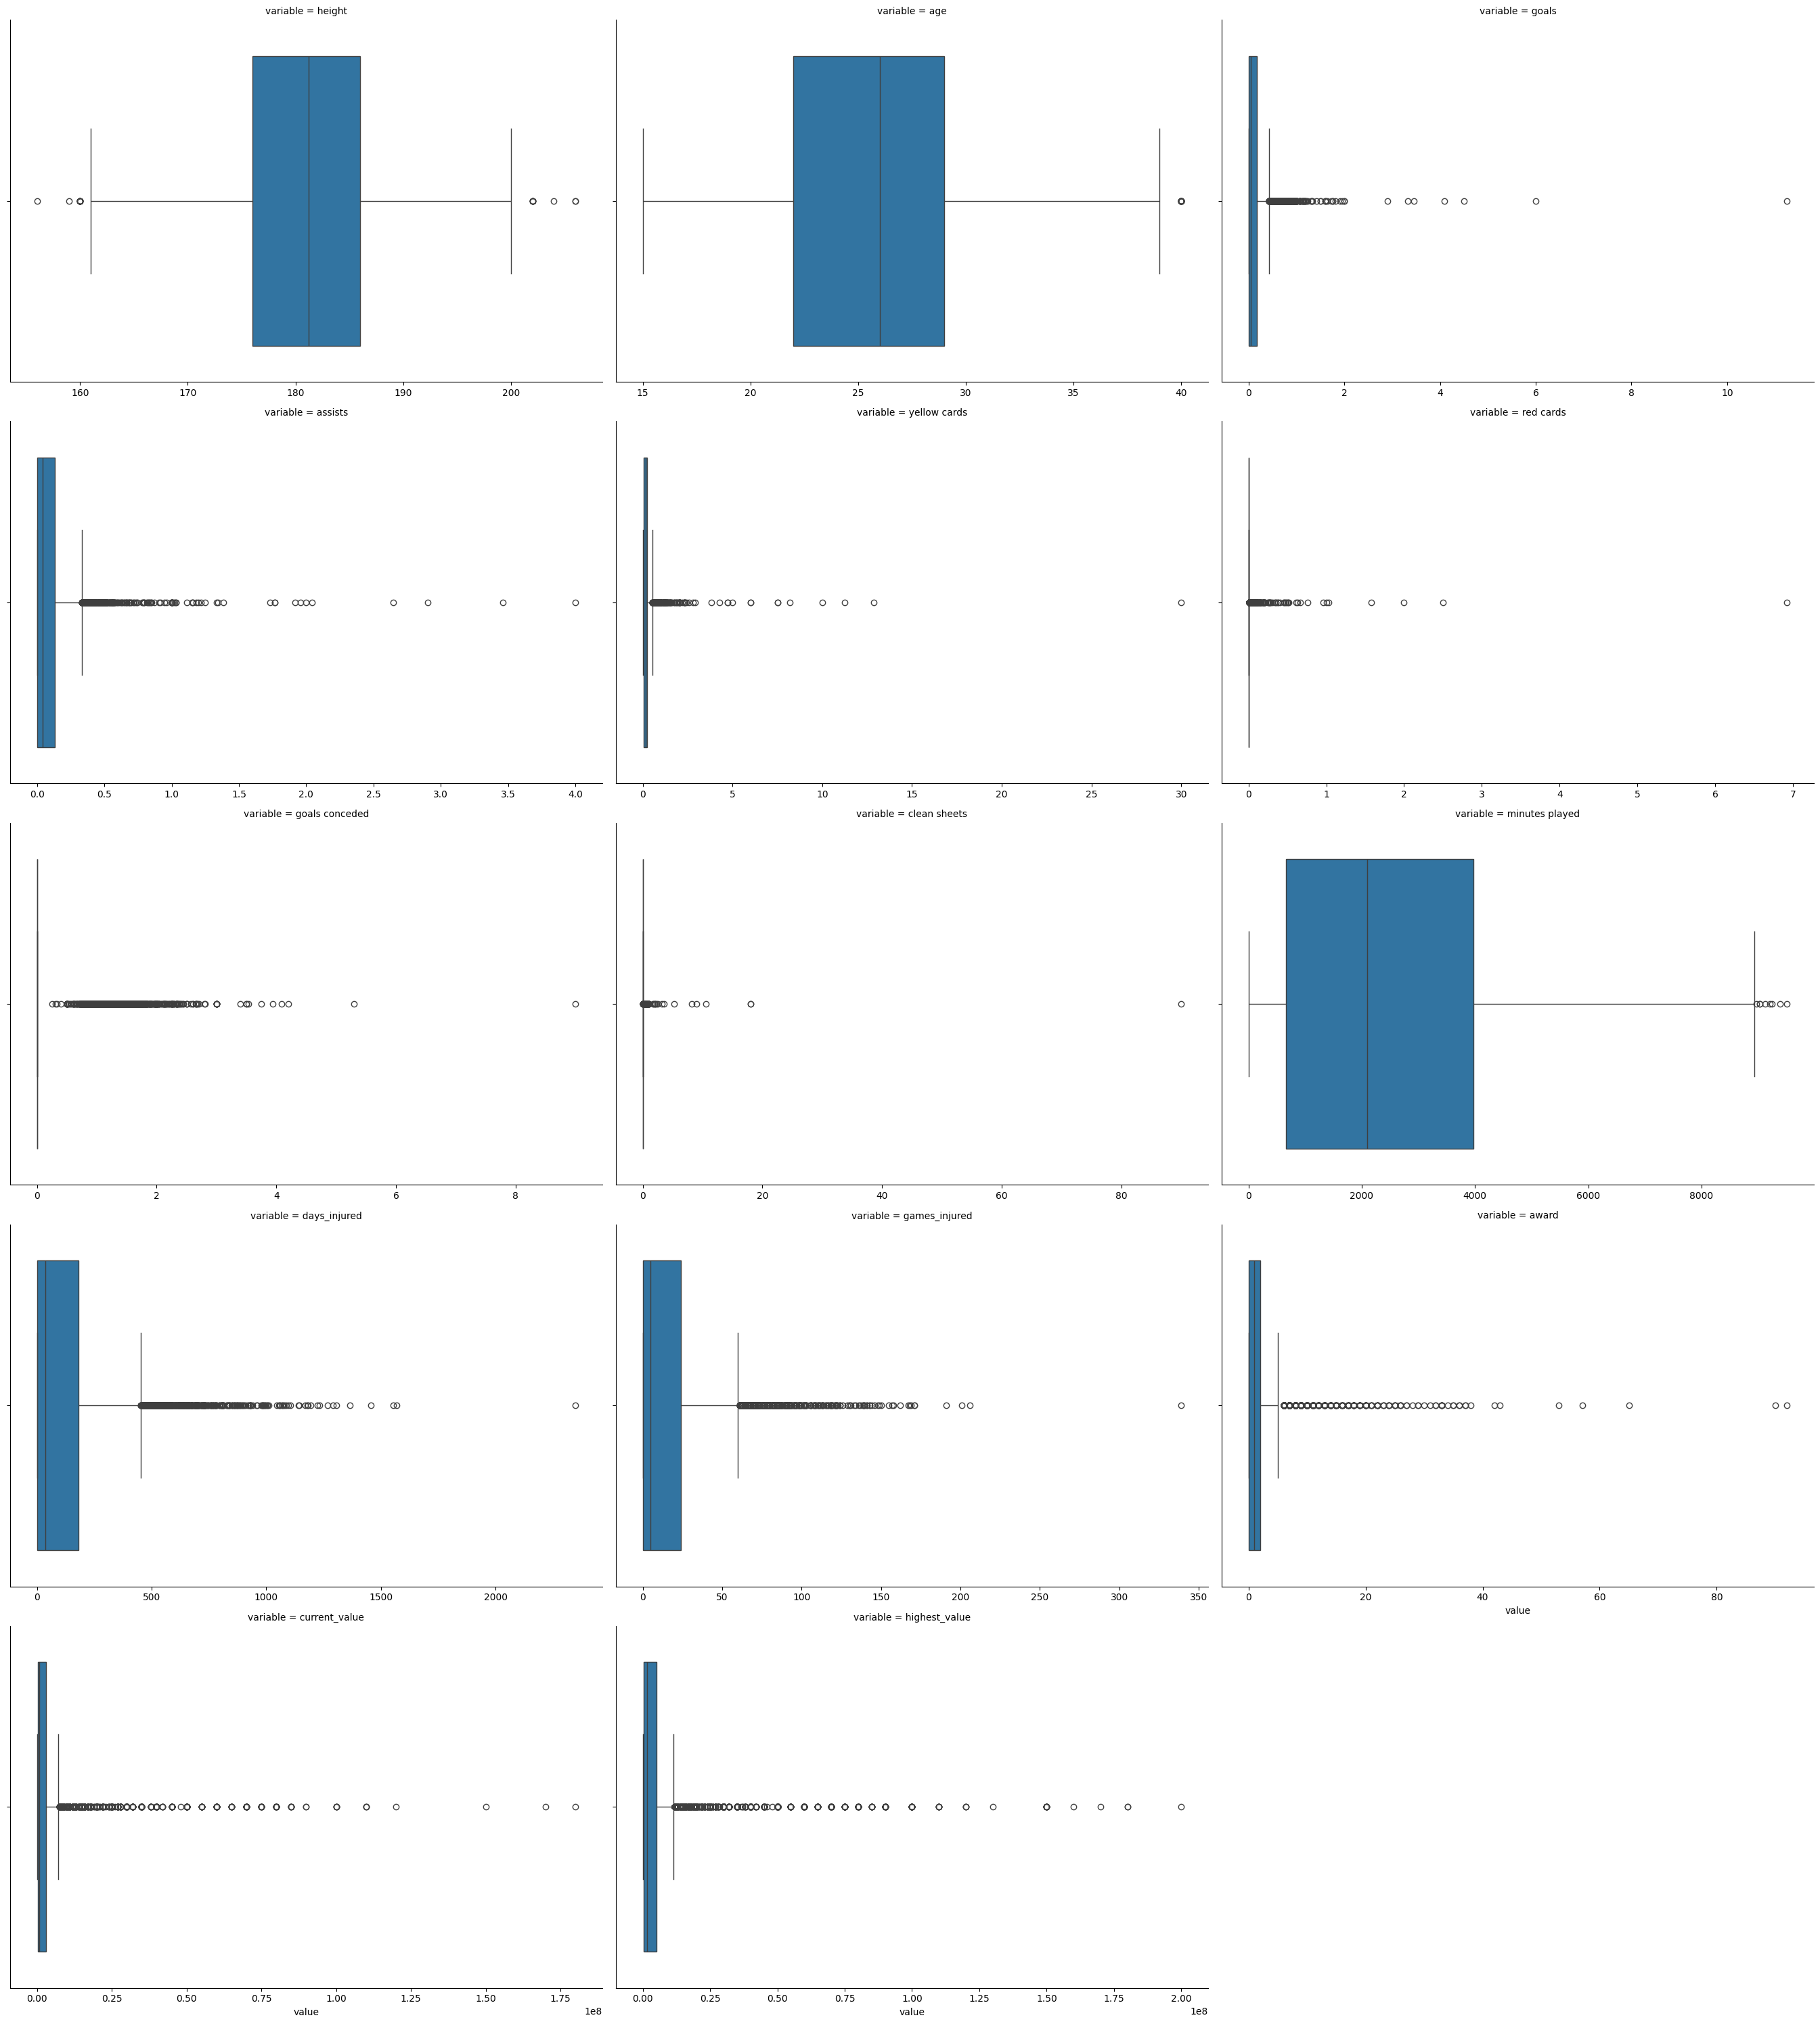

In [32]:
numerical_columns = ['height', 'age', 'goals', 'assists', 'yellow cards', 'red cards', 
                     'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 
                     'games_injured', 'award', 'current_value', 'highest_value']


long_data = pd.melt(df, value_vars=numerical_columns)

g = sns.FacetGrid(long_data, col="variable", col_wrap=3, height=6, aspect=1.5, sharex=False)
g.map(sns.boxplot, "value")
plt.show()

### Correcting errors

-------------------

In [33]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [34]:
descriptive = df.describe()

In [35]:
value = {column: df[column].value_counts() for column in categorical_columns}

In [36]:
ranges = df[numerical_columns].agg(['min', 'max'])

In [37]:
unique_values = df.nunique()

In [38]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]

numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

correlations = numeric_df.corr()

In [39]:
descriptive, value, ranges, unique_values, correlations

(             height           age    appearance         goals       assists  \
 count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
 mean     181.240353     26.039765     36.407011      0.125554      0.086978   
 std        6.969818      4.770956     26.526541      0.235585      0.143351   
 min      156.000000     15.000000      0.000000      0.000000      0.000000   
 25%      176.000000     22.000000     12.000000      0.000000      0.000000   
 50%      181.240353     26.000000     35.000000      0.045969      0.040773   
 75%      186.000000     29.000000     59.000000      0.172263      0.133136   
 max      206.000000     40.000000    107.000000     11.250000      4.000000   
 
        yellow cards  second yellow cards     red cards  goals conceded  \
 count  10754.000000         10754.000000  10754.000000    10754.000000   
 mean       0.189757             0.004666      0.006826        0.131655   
 std        0.432388             0.025232      0.0811

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

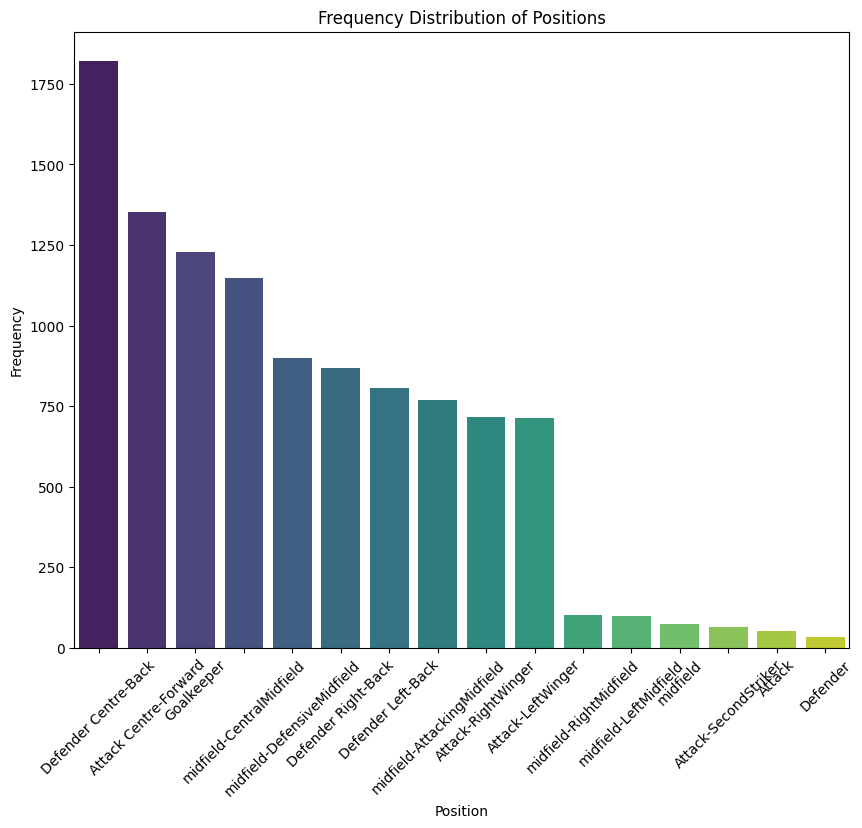

In [40]:
position_counts = df['position'].value_counts()

# Plot a bar chart for the 'position' column
plt.figure(figsize=(10, 8))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')
plt.title('Frequency Distribution of Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

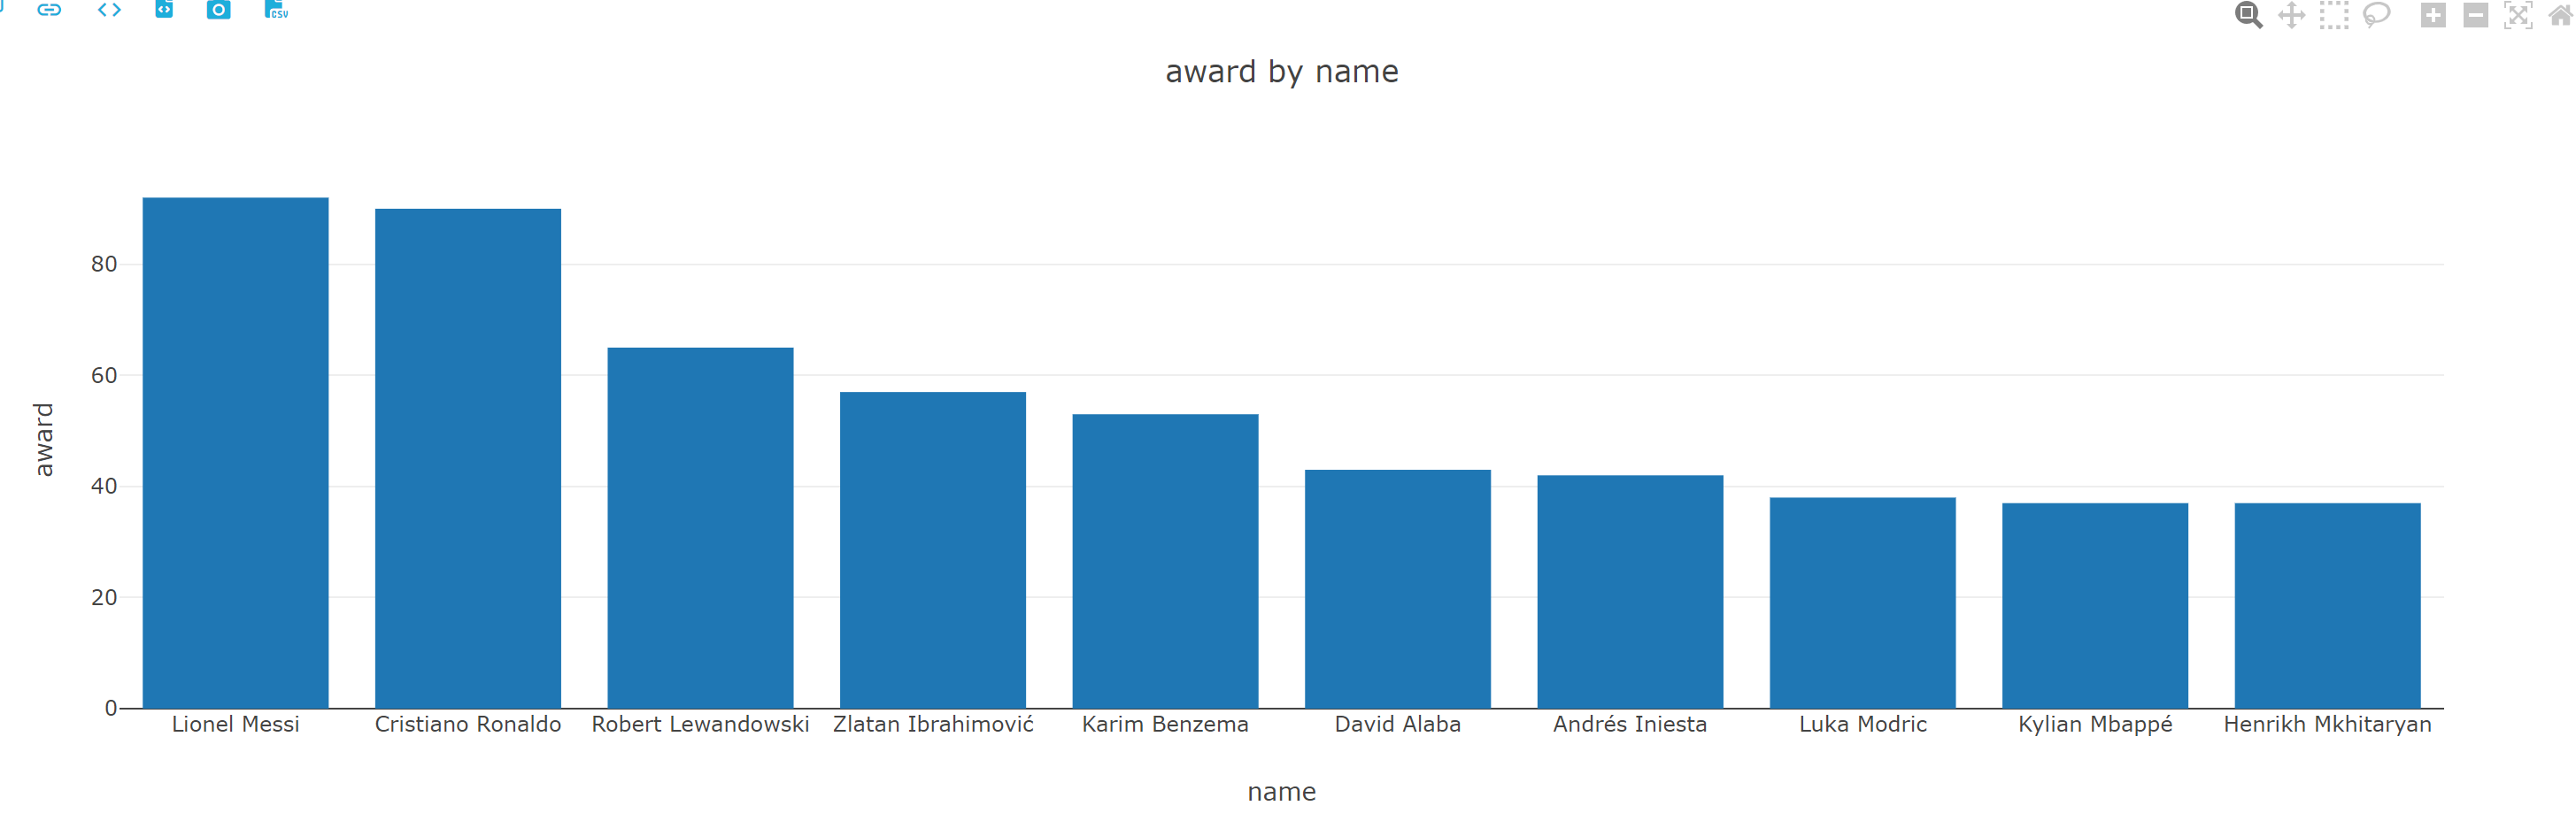

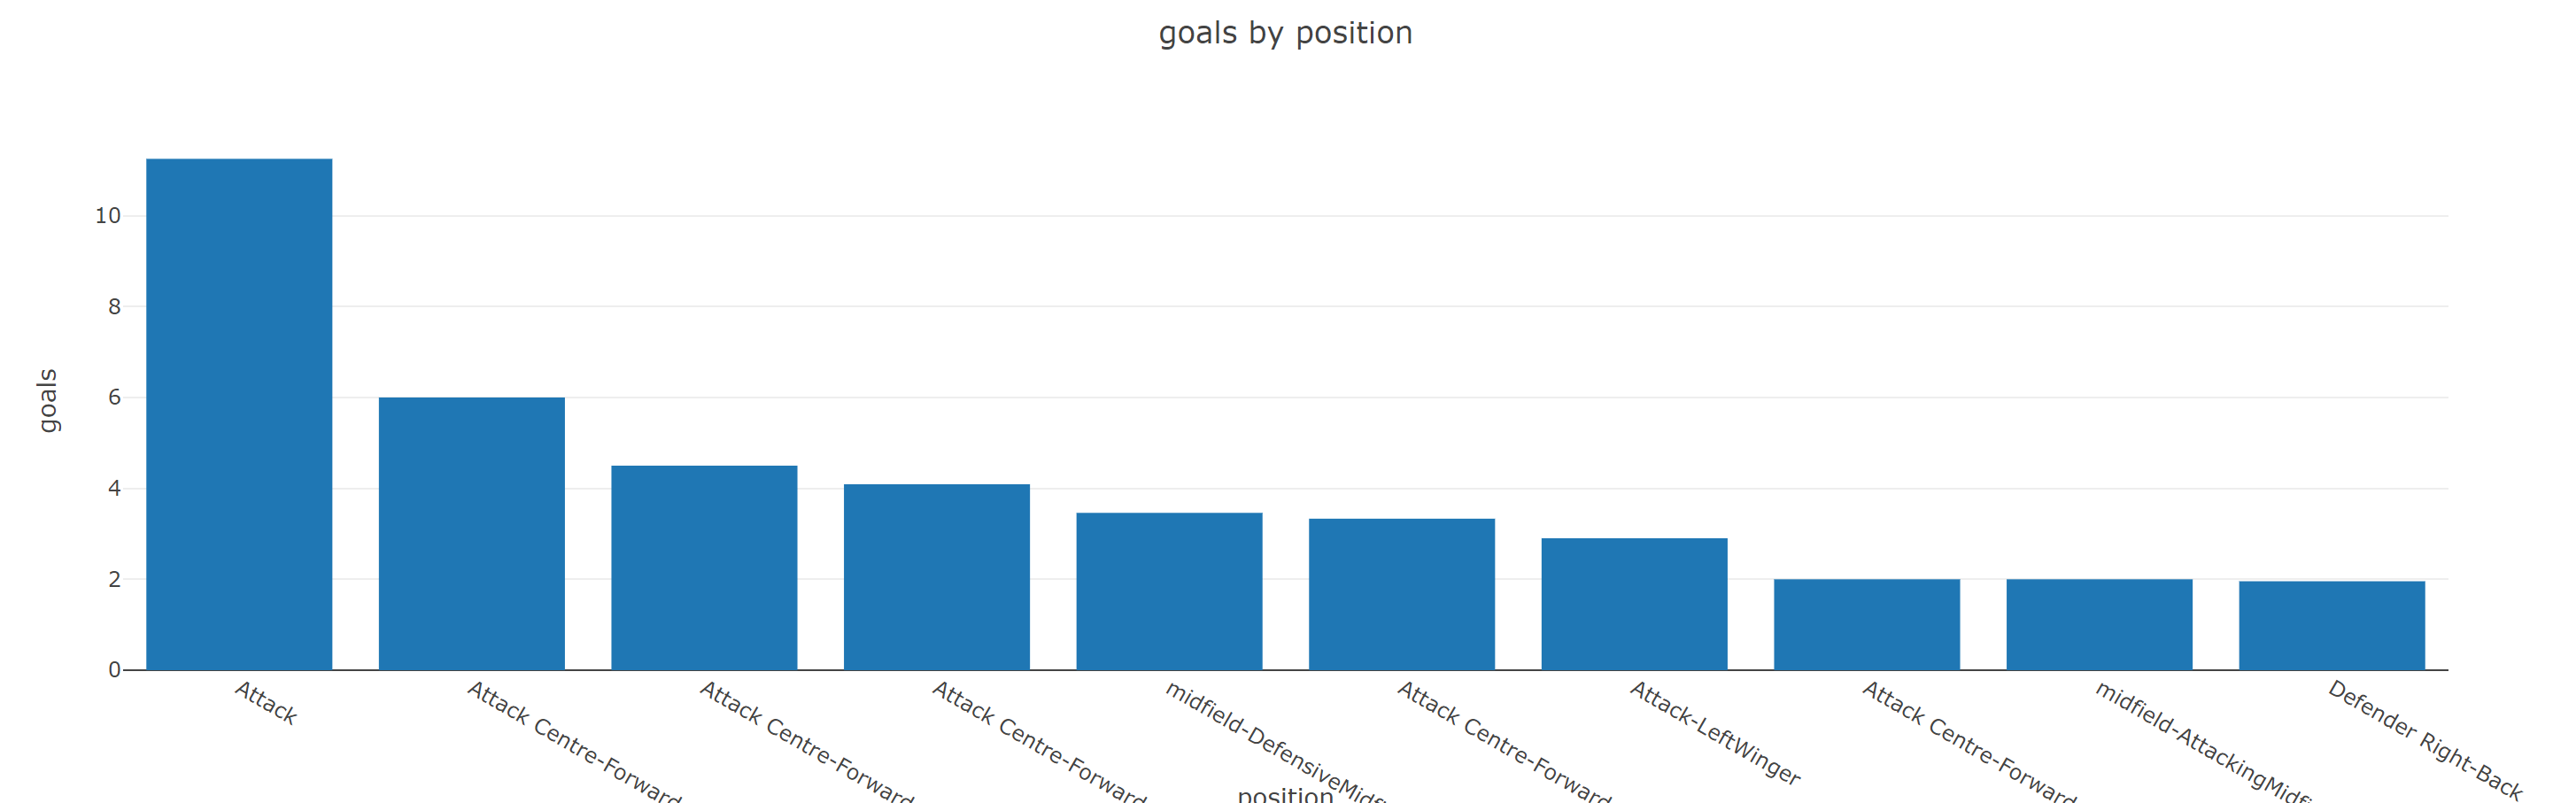

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [41]:
variability = df[numerical_columns].agg(['std', 'var', 'min', 'max', 'quantile'])

print("Measures of Variability:")
print(variability)

Measures of Variability:
              height        age      goals   assists  yellow cards  red cards  \
std         6.969818   4.770956   0.235585  0.143351      0.432388   0.081143   
var        48.578366  22.762022   0.055500  0.020550      0.186959   0.006584   
min       156.000000  15.000000   0.000000  0.000000      0.000000   0.000000   
max       206.000000  40.000000  11.250000  4.000000     30.000000   6.923077   
quantile  181.240353  26.000000   0.045969  0.040773      0.150250   0.000000   

          goals conceded  clean sheets  minutes played  days_injured  \
std             0.442335      0.924437    2.021703e+03    175.206827   
var             0.195661      0.854584    4.087284e+06  30697.432179   
min             0.000000      0.000000    0.000000e+00      0.000000   
max             9.000000     90.000000    9.510000e+03   2349.000000   
quantile        0.000000      0.000000    2.101500e+03     37.000000   

          games_injured      award  current_value  high

In [42]:
shape_measures = df[numerical_columns].agg(['skew', 'kurt'])

print("Measures of Shape:")
print(shape_measures)

Measures of Shape:
        height       age       goals     assists  yellow cards    red cards  \
skew -0.047892  0.343670   14.261621    7.353238     38.233867    63.311587   
kurt -0.333910 -0.528252  528.803378  126.355062   2270.748495  5047.295913   

      goals conceded  clean sheets  minutes played  days_injured  \
skew        4.166103     87.390620        0.631469      2.389145   
kurt       28.401938   8369.280548       -0.507871      8.948364   

      games_injured      award  current_value  highest_value  
skew       2.347507   6.505613       6.453459       5.069477  
kurt       9.221563  90.932885      63.339432      37.244470  


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [43]:
scaler = StandardScaler()
numerical_cols = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
                  'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
                  'minutes played', 'days_injured', 'games_injured', 'current_value', 
                  'highest_value']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [44]:
for column in numerical_cols:
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].clip(lower_bound, upper_bound)

In [45]:
df_numeric = df.select_dtypes(include=['number'])

# Drop rows with missing values
df_numeric = df_numeric.dropna()

# Split data into features and target variable
X = df_numeric.drop('current_value', axis=1)
y = df_numeric['current_value']

# Fit a RandomForestRegressor to get feature importances
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)

highest_value          0.734370
age                    0.133270
minutes played         0.054045
appearance             0.017826
yellow cards           0.009157
goals                  0.008242
assists                0.007741
days_injured           0.007401
award                  0.006609
height                 0.006592
games_injured          0.006414
second yellow cards    0.002669
red cards              0.002281
position_encoded       0.001487
winger                 0.000978
goals conceded         0.000539
clean sheets           0.000379
dtype: float64


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [47]:
ridge_model = Ridge() 

In [48]:
lasso_model = Lasso()

In [49]:
param_grid = {
    'alpha': [0.01,0.05,0.09,0.010] 
 }
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [50]:
model.fit(X_train, y_train)


LinearRegression()

In [51]:
ridge_model.fit(X_train, y_train)


Ridge()

In [52]:
lasso_model.fit(X_train, y_train)


Lasso()

In [53]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.09, 0.01]},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
y_pred = model.predict(X_test)


In [55]:
y_pred_ridge = ridge_model.predict(X_test)


In [56]:
y_pred_lasso = lasso_model.predict(X_test)


In [57]:
print("Best parameters found: ", grid_search.best_params_)
best_ridge = grid_search.best_estimator_

Best parameters found:  {'alpha': 0.01}


In [58]:
y_pred_ridge_cv = best_ridge.predict(X_test)

In [59]:
y_pred_lasso_cv = best_ridge.predict(X_test)

In [60]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,-0.002339
age,-0.105136
appearance,-0.126307
goals,0.027751
assists,0.021600
yellow cards,0.001256
second yellow cards,-0.008509
red cards,-0.088730
goals conceded,-0.022325
clean sheets,0.130209


In [61]:
r_coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
r_coeff_df

,Coefficient
height,-0.002314
age,-0.105125
appearance,-0.125742
goals,0.027747
assists,0.021588
yellow cards,0.001175
second yellow cards,-0.008533
red cards,-0.088422
goals conceded,-0.022101
clean sheets,0.127036


In [62]:
l_coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
l_coeff_df

,Coefficient
height,0.0
age,-0.0
appearance,0.0
goals,0.0
assists,0.0
yellow cards,0.0
second yellow cards,0.0
red cards,-0.0
goals conceded,-0.0
clean sheets,-0.0


In [63]:
print(model.intercept_) 

0.05462975185500202


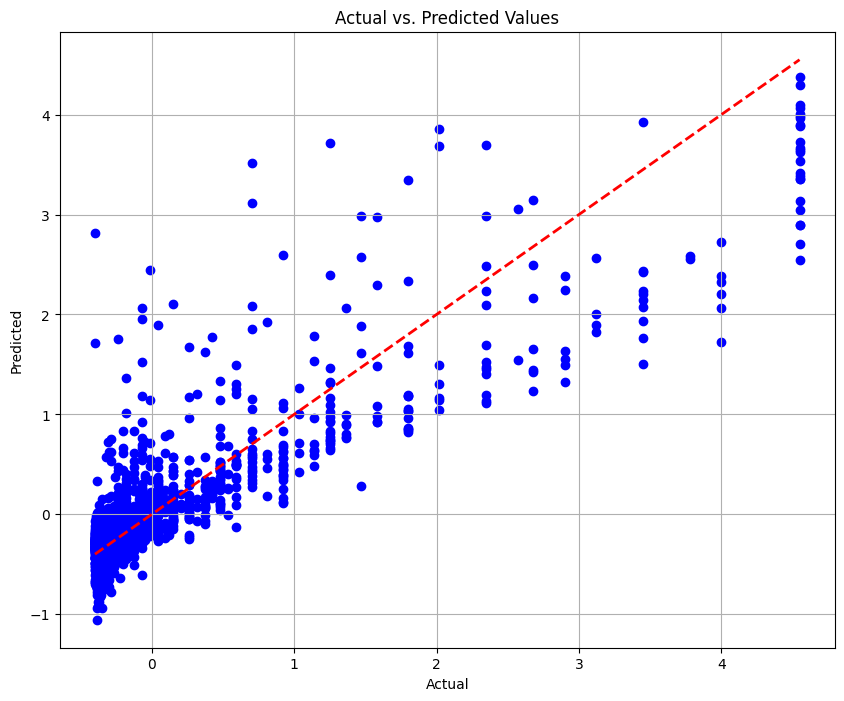

In [64]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [65]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(0.21220881463840371, 0.3764265978733965, 0.7757106894980479)

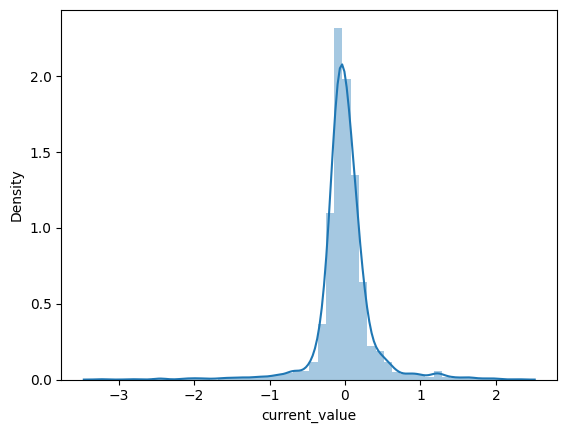

In [66]:
sns.distplot((y_test-y_pred),bins=50); 


# Logistic Regression

In [67]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,1.113373,1.249333,2.171247,-0.532971,-0.606773,-0.416711,...,2.454353,0.314349,2.477482,-0.433575,-0.463008,13,1.250912,4.768555,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,2.117750,0.830110,-0.807041,-0.532971,-0.606773,-0.279250,...,2.511052,0.175438,-0.577159,2.237678,1.803642,1,-0.233422,1.183591,1,0


In [68]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance             float64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played         float64
days_injured           float64
games_injured          float64
award                    int64
current_value          float64
highest_value          float64
position_encoded         int64
winger                   int64
dtype: object

In [69]:
df["position_encoded"].value_counts()

position_encoded
2    3528
3    3095
4    2902
1    1229
Name: count, dtype: int64

In [70]:
df.drop(["position","player","name"], axis=1, inplace=True)

categorical_features = list(df.select_dtypes(object).columns)
numeric_features = list(df.select_dtypes('number'))


numeric_features.remove("highest_value")


print(categorical_features)
print(numeric_features)

['team']
['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'position_encoded', 'winger']


In [71]:
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

df['price_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

print(df['price_category'].value_counts())

price_category
Good_Price     4310
Cheap_Price    3754
High_Price     2690
Name: count, dtype: int64


In [74]:
encoder = LabelEncoder()
df['price_category_encoded'] = encoder.fit_transform(df['price_category'])  

In [75]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['price_category_encoded'].sort_values(ascending=False))

price_category_encoded    1.000000
appearance                0.546846
highest_value             0.536261
minutes played            0.519978
award                     0.242359
games_injured             0.241831
assists                   0.235085
days_injured              0.210630
goals                     0.185666
position_encoded          0.135433
yellow cards              0.075393
red cards                 0.041559
second yellow cards       0.040715
winger                    0.025773
age                       0.025118
height                    0.023653
clean sheets             -0.095995
goals conceded           -0.126176
Name: price_category_encoded, dtype: float64


In [76]:
threshold = 0.02  

selected_features = correlation[abs(correlation['price_category_encoded']) > threshold]['price_category_encoded'].index
selected_features

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'winger',
       'price_category_encoded'],
      dtype='object')

In [77]:
print(df['price_category_encoded'].value_counts())

price_category_encoded
1    4310
0    3754
2    2690
Name: count, dtype: int64


In [78]:
df = df[selected_features]
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger,price_category_encoded
0,1.113373,1.249333,2.171247,-0.532971,-0.606773,-0.416711,-0.184919,-0.084128,2.454353,0.314349,2.477482,-0.433575,-0.463008,13,4.768555,1,0,2
1,2.117750,0.830110,-0.807041,-0.532971,-0.606773,-0.279250,-0.184919,-0.084128,2.511052,0.175438,-0.577159,2.237678,1.803642,1,1.183591,1,0,1
2,0.969891,2.297390,-1.221739,-0.532971,-0.606773,-0.438879,-0.184919,-0.084128,1.096013,0.492343,-1.077750,3.305038,2.915584,4,-0.011398,1,0,1
3,-0.895381,-0.217946,1.718849,-0.413731,-0.214852,0.080861,-0.184919,-0.084128,-0.297651,-0.048552,1.947563,0.325564,0.264031,9,3.274820,2,0,2
4,1.400338,0.830110,1.002552,-0.457033,-0.481975,-0.314755,-0.184919,-0.084128,-0.297651,-0.048552,1.266422,0.685155,1.504273,21,4.768555,2,0,2


In [79]:
X = df.drop(['price_category_encoded'], axis=1)
y = df['price_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
model = LogisticRegression()

In [83]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [84]:
y_pred = model.predict(X_test_scaled)

In [85]:
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,-0.012644
age,-0.719456
appearance,-0.159632
goals,0.065129
assists,0.098782
yellow cards,0.051290
second yellow cards,0.005938
red cards,-0.017149
goals conceded,-0.226887
clean sheets,0.135712


In [86]:
print(model.intercept_) 

[-1.88669979  1.35900613  0.52769366]


In [87]:
base_model = round(df['price_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

40.08

In [88]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7182705718270572

In [89]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7286992909450192

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred) 
conf_matrix

array([[622, 130,   4],
       [278, 554,  50],
       [  0, 144, 369]], dtype=int64)

In [91]:
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.74


In [92]:
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.72


In [93]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.73
